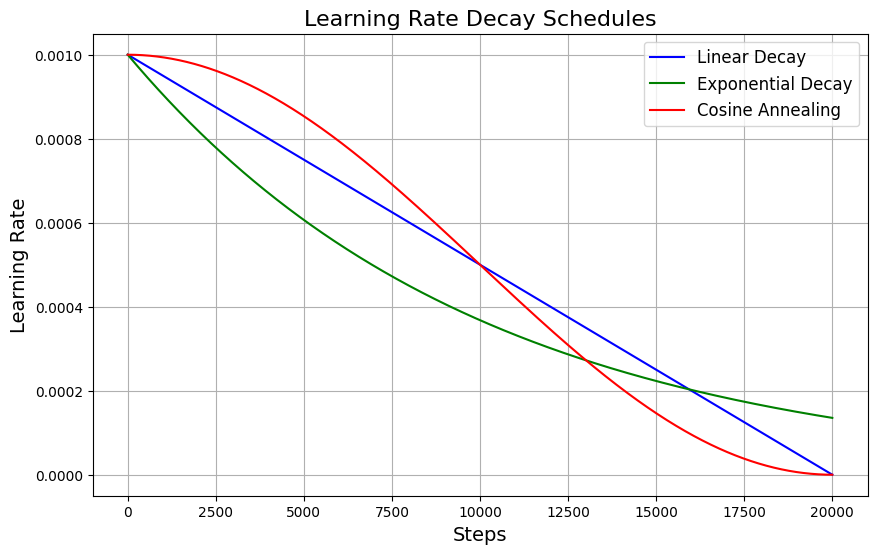

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the decay schedules
initial_lr = 0.001
total_steps = 20000
decay_rate = 0.0001  # For exponential decay

# Linear decay
linear_lr = [initial_lr - (initial_lr / total_steps) * step for step in range(total_steps)]

# Exponential decay
exponential_lr = [initial_lr * np.exp(-decay_rate * step) for step in range(total_steps)]

# Cosine annealing
cosine_lr = [
    initial_lr * 0.5 * (1 + np.cos(np.pi * step / total_steps)) for step in range(total_steps)
]

# Plotting the decay schedules
plt.figure(figsize=(10, 6))
plt.plot(linear_lr, label="Linear Decay", color="blue")
plt.plot(exponential_lr, label="Exponential Decay", color="green")
plt.plot(cosine_lr, label="Cosine Annealing", color="red")

# Formatting the plot
plt.title("Learning Rate Decay Schedules", fontsize=16)
plt.xlabel("Steps", fontsize=14)
plt.ylabel("Learning Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


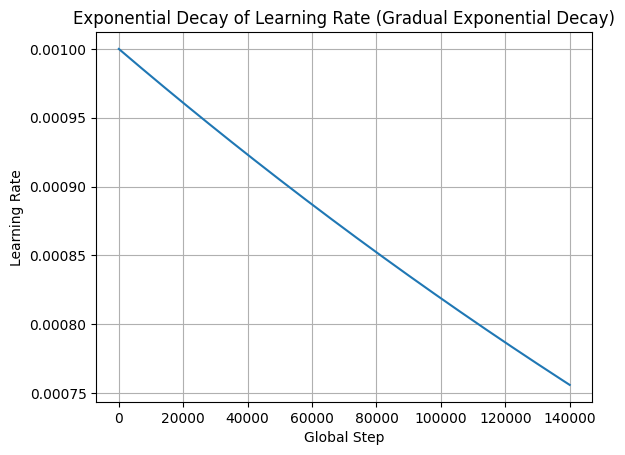

Learning rate at step 140000 : 0.0007557837414557255


In [37]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_decay_learning_rate(initial_lr, decay_rate, global_step, decay_steps=1000):
    """
    Calculate the learning rate using exponential decay.

    Args:
    - initial_lr (float): Initial learning rate.
    - decay_rate (float): Decay rate for the learning rate (should be kept low for gradual decay).
    - global_step (int): Current training step (or epoch).
    - decay_steps (int): Number of steps for the decay (default: 100).

    Returns:
    - float: Decayed learning rate.
    """
    lr = initial_lr * np.exp(-decay_rate * global_step / decay_steps)
    return lr

# Example usage
initial_lr = 0.001
decay_rate = 0.002  # Adjusted decay rate for exponential decay
global_steps = np.arange(0, 140001, 1000)  # Range of global steps from 0 to 140000 with step 1000
learning_rates = [exponential_decay_learning_rate(initial_lr, decay_rate, step) for step in global_steps]

# Plot the learning rate decay
plt.plot(global_steps, learning_rates)
plt.title("Exponential Decay of Learning Rate (Gradual Exponential Decay)")
plt.xlabel("Global Step")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()

# Print the learning rate at the last global step
global_step = 140000
learning_rate = exponential_decay_learning_rate(initial_lr, decay_rate, global_step)
print("Learning rate at step", global_step, ":", learning_rate)


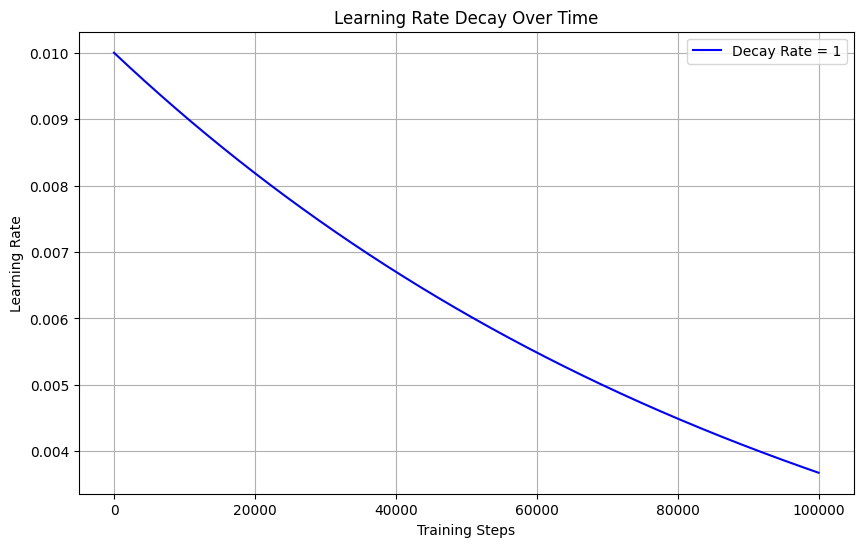

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_rate_decay(initial_lr, decay_rate, max_steps):
    """
    Plot the learning rate decay over the training steps.
    
    :param initial_lr: Initial learning rate
    :param decay_rate: Decay rate (controls how fast the learning rate decreases)
    :param max_steps: Total training steps (decay happens over these steps)
    """
    # Simulate the decay of the learning rate over the steps
    steps = np.arange(0, max_steps)
    decay_steps = max_steps  # Set decay_steps equal to max_steps
    learning_rates = initial_lr * np.exp(-decay_rate * steps / decay_steps)
    
    # Plotting the decay curve
    plt.figure(figsize=(10, 6))
    plt.plot(steps, learning_rates, label=f'Decay Rate = {decay_rate}', color='b')
    plt.xlabel('Training Steps')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate Decay Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters for the plot
initial_lr = 0.01  # Initial learning rate
decay_rate = 1  # Adjust decay rate for the curve's "bend"
max_steps = 100000  # Total training steps

# Plot the learning rate decay curve
plot_learning_rate_decay(initial_lr, decay_rate, max_steps)


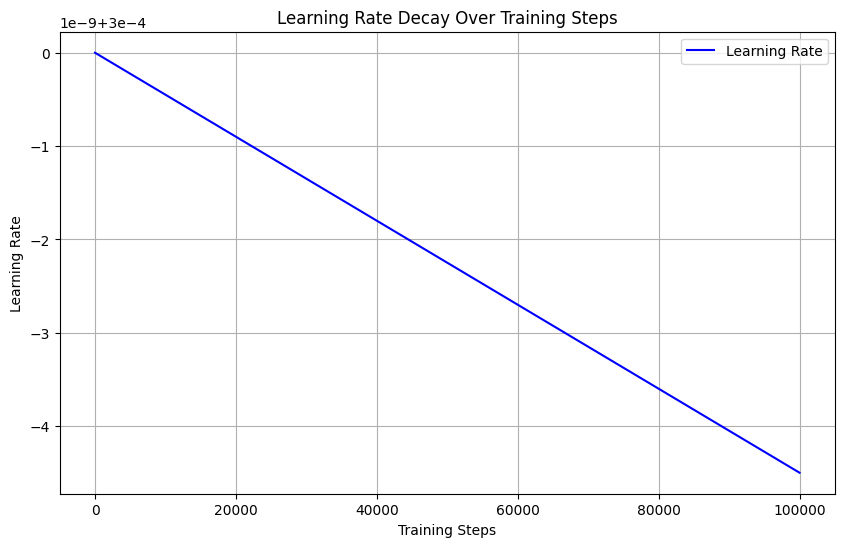

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_lr = 3e-4  # Starting learning rate (default for PPO)
decay_rate = 1.5e-5  # Moderate decay rate
decay_steps = 100000  # Total number of training steps
max_steps = 100000  # Total training steps

# Calculate the learning rate at each step
steps = np.arange(max_steps)
learning_rates = initial_lr * np.exp(-decay_rate * steps / decay_steps)

# Plot the learning rate decay
plt.figure(figsize=(10, 6))
plt.plot(steps, learning_rates, label="Learning Rate", color='b')
plt.title("Learning Rate Decay Over Training Steps")
plt.xlabel("Training Steps")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.legend()
plt.show()


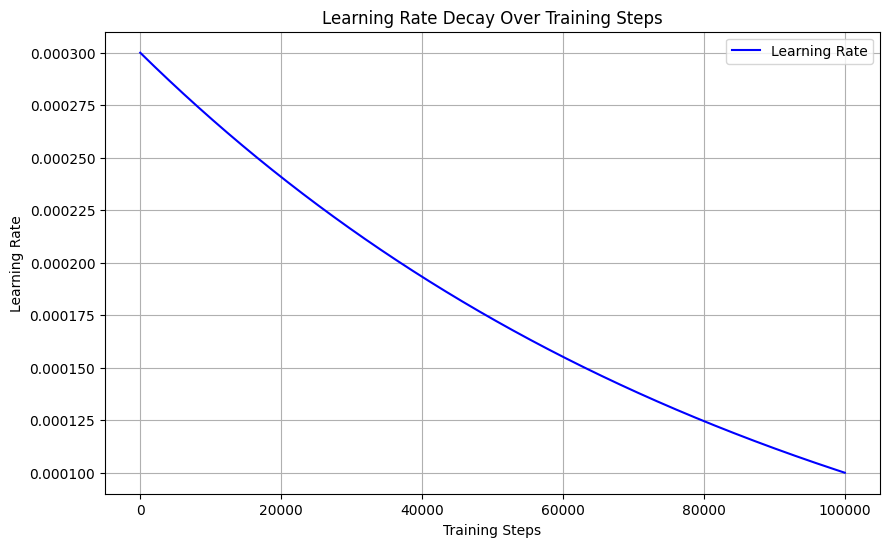

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_lr = 3e-4  # Starting learning rate (default for PPO)
final_lr = 0.0001  # Final learning rate after 100000 steps
max_steps = 100000  # Total training steps

# Calculate the decay rate to reach final_lr at max_steps
decay_rate = -np.log(final_lr / initial_lr) / max_steps

# Calculate the learning rate at each step
steps = np.arange(max_steps)
learning_rates = initial_lr * np.exp(-decay_rate * steps)

# Plot the learning rate decay
plt.figure(figsize=(10, 6))
plt.plot(steps, learning_rates, label="Learning Rate", color='b')
plt.title("Learning Rate Decay Over Training Steps")
plt.xlabel("Training Steps")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.legend()
plt.show()


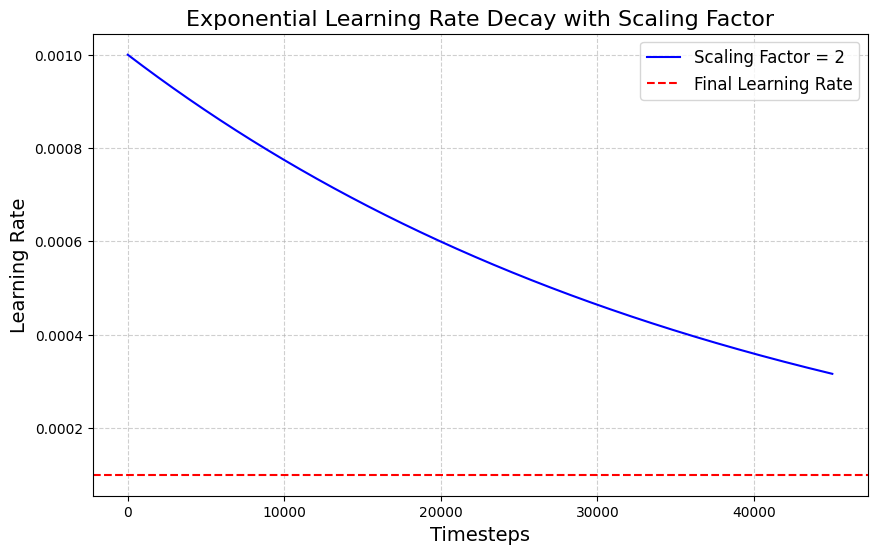

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_rate_decay(max_steps, initial_lr, final_lr, scaling_factor=1.0):
    """
    Plots the learning rate decay curve with an adjustable scaling factor.
    
    :param max_steps: Total number of training steps.
    :param initial_lr: Initial learning rate.
    :param final_lr: Final learning rate.
    :param scaling_factor: Factor to control the steepness of decay.
    """
    # Calculate the decay rate with the scaling factor
    decay_rate = -np.log(final_lr / initial_lr) / (max_steps * scaling_factor)

    # Generate timesteps and corresponding learning rates
    timesteps = np.arange(0, max_steps + 1)
    learning_rates = initial_lr * np.exp(-decay_rate * timesteps)

    # Plotting the learning rate schedule
    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, learning_rates, label=f"Scaling Factor = {scaling_factor}", color="blue")
    plt.title("Exponential Learning Rate Decay with Scaling Factor", fontsize=16)
    plt.xlabel("Timesteps", fontsize=14)
    plt.ylabel("Learning Rate", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(y=final_lr, color='red', linestyle='--', label="Final Learning Rate")
    plt.legend(fontsize=12)
    plt.show()

# Example call
plot_learning_rate_decay(max_steps=45_000, initial_lr=1e-3, final_lr=1e-4, scaling_factor=2)


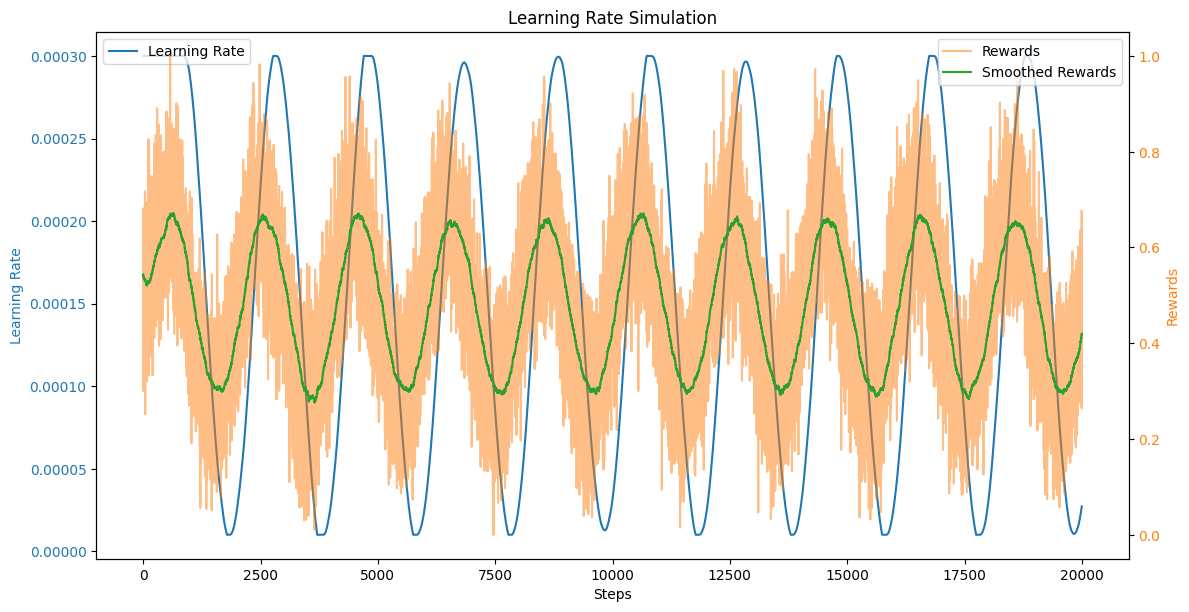

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_learning_rate(
    steps=20000,
    initial_lr=0.01,
    final_lr=0.0001,
    temperature=0.1,
    trend_window=500,
    smoothing_factor=0.99,
):
    """
    Simulate learning rate adjustment based on reward trends.

    :param steps: Total number of steps.
    :param initial_lr: Initial learning rate.
    :param final_lr: Final learning rate.
    :param temperature: Controls sensitivity to reward trends.
    :param trend_window: Number of steps to consider for reward trend.
    :param smoothing_factor: Exponential smoothing factor for rewards.
    """
    # Simulated rewards with noise and trends
    rewards = np.sin(np.linspace(0, 20 * np.pi, steps)) + 0.5 * np.random.randn(steps)
    rewards = (rewards - rewards.min()) / (rewards.max() - rewards.min())  # Normalize to [0, 1]

    # Initialize variables
    learning_rates = []
    smoothed_rewards = []
    ema_reward = rewards[0]
    current_lr = initial_lr

    for t in range(steps):
        # Update EMA reward
        ema_reward = smoothing_factor * ema_reward + (1 - smoothing_factor) * rewards[t]
        smoothed_rewards.append(ema_reward)

        # Calculate reward trend over the trend window
        if t >= trend_window:
            reward_trend = (ema_reward - smoothed_rewards[t - trend_window]) / trend_window
        else:
            reward_trend = 0

        # Adjust learning rate based on trend
        adjustment = temperature * reward_trend
        current_lr = np.clip(current_lr + adjustment, final_lr, initial_lr)
        learning_rates.append(current_lr)

    # Plot results
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Learning Rate", color="tab:blue")
    ax1.plot(range(steps), learning_rates, label="Learning Rate", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Rewards", color="tab:orange")
    ax2.plot(range(steps), rewards, label="Rewards", alpha=0.5, color="tab:orange")
    ax2.plot(range(steps), smoothed_rewards, label="Smoothed Rewards", color="tab:green")
    ax2.tick_params(axis="y", labelcolor="tab:orange")

    fig.tight_layout()
    plt.title("Learning Rate Simulation")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.show()

# Example usage
simulate_learning_rate(
    steps=20000,
    initial_lr=0.0003,
    final_lr=0.00001,
    temperature=0.0009,
    trend_window=500,
    smoothing_factor=0.99,
)


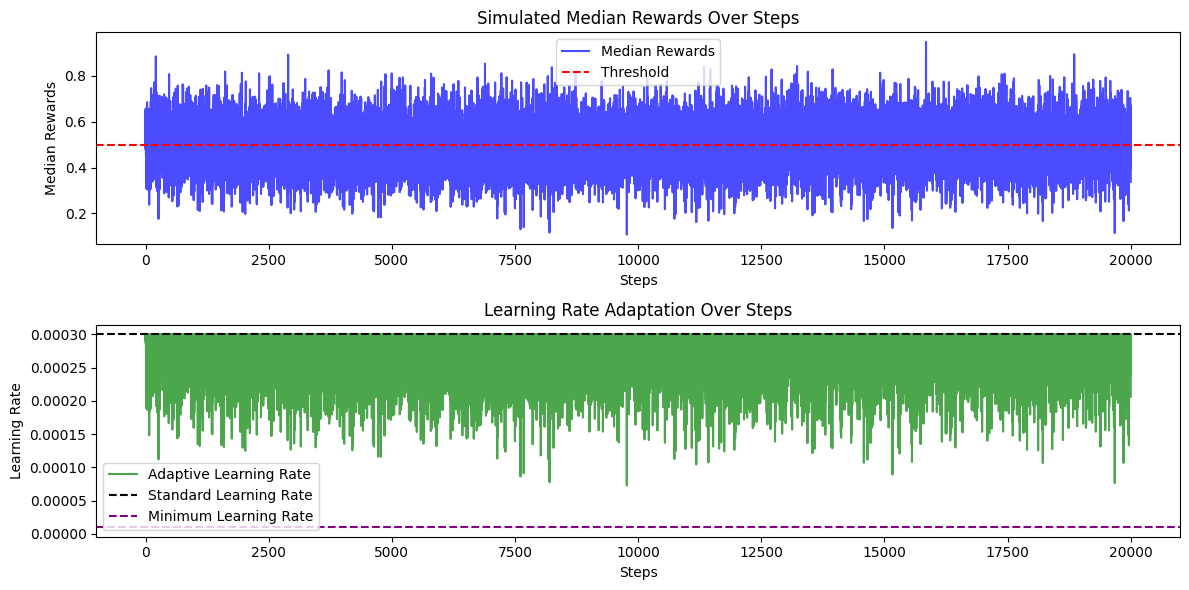

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
standard_lr = 0.0003
min_lr = 0.00001
threshold = 0.5
steps = 20000

# Simulating rewards and learning rate adjustments
np.random.seed(42)  # For reproducibility
median_rewards = np.clip(np.random.normal(0.5, 0.1, steps), 0, 1)  # Simulated rewards (bounded 0 to 1)
adaptive_lr = []

for reward in median_rewards:
    if reward < threshold:
        adjustment = (threshold - reward) / threshold
        lr = standard_lr - adjustment * (standard_lr - min_lr)
    else:
        lr = standard_lr
    adaptive_lr.append(max(min_lr, lr))  # Ensure lr stays within bounds

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot median rewards
plt.subplot(2, 1, 1)
plt.plot(median_rewards, label='Median Rewards', color='blue', alpha=0.7)
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Simulated Median Rewards Over Steps')
plt.xlabel('Steps')
plt.ylabel('Median Rewards')
plt.legend()

# Plot learning rate
plt.subplot(2, 1, 2)
plt.plot(adaptive_lr, label='Adaptive Learning Rate', color='green', alpha=0.7)
plt.axhline(y=standard_lr, color='black', linestyle='--', label='Standard Learning Rate')
plt.axhline(y=min_lr, color='purple', linestyle='--', label='Minimum Learning Rate')
plt.title('Learning Rate Adaptation Over Steps')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()


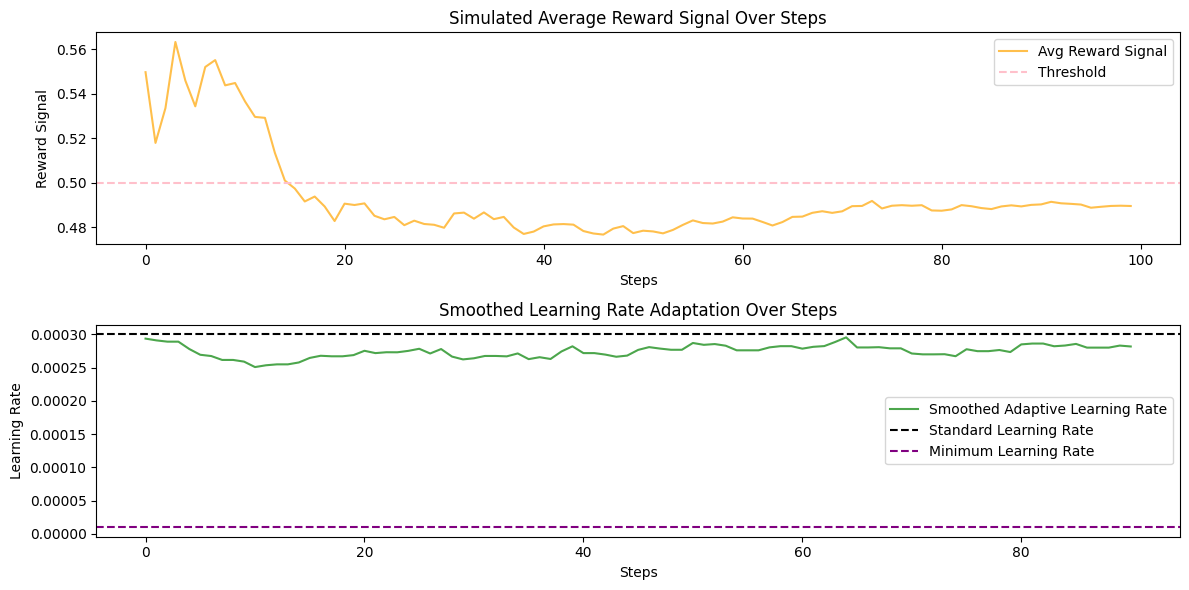

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
standard_lr = 0.0003
min_lr = 0.00001
threshold = 0.5
steps = 100
window_size = 10  # Window size for smoothing

# Simulating rewards and learning rate adjustments
np.random.seed(42)  # For reproducibility
median_rewards = np.clip(np.random.normal(0.5, 0.1, steps), 0, 1)  # Simulated rewards (bounded 0 to 1)
avg_reward_signal = np.zeros(steps)  # To store the fluctuating reward signal
adaptive_lr = []

# Calculate the average reward signal
for i, reward in enumerate(median_rewards):
    # Compute the moving average (simple average in this case) to simulate fluctuations
    avg_reward_signal[i] = np.mean(median_rewards[:i+1])
    
    # Check if the reward is below the threshold
    if reward < threshold:
        # Proportional adjustment to learning rate if below threshold
        adjustment = (threshold - reward) / threshold
        lr = standard_lr - adjustment * (standard_lr - min_lr)
    else:
        # Keep learning rate constant at standard_lr when above threshold
        lr = standard_lr
    
    # Append the adjusted learning rate, ensuring it doesn't go below min_lr
    adaptive_lr.append(max(min_lr, lr))  # Ensure lr stays within bounds

# Smooth the adaptive learning rate using a moving average
adaptive_lr_smooth = np.convolve(adaptive_lr, np.ones(window_size) / window_size, mode='valid')

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot average reward signal
plt.subplot(2, 1, 1)
plt.plot(avg_reward_signal, label='Avg Reward Signal', color='orange', alpha=0.7)
plt.axhline(y=threshold, color='pink', linestyle='--', label='Threshold')
plt.title('Simulated Average Reward Signal Over Steps')
plt.xlabel('Steps')
plt.ylabel('Reward Signal')
plt.legend()

# Plot learning rate
plt.subplot(2, 1, 2)
plt.plot(adaptive_lr_smooth, label='Smoothed Adaptive Learning Rate', color='green', alpha=0.7)
plt.axhline(y=standard_lr, color='black', linestyle='--', label='Standard Learning Rate')
plt.axhline(y=min_lr, color='purple', linestyle='--', label='Minimum Learning Rate')
plt.title('Smoothed Learning Rate Adaptation Over Steps')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()


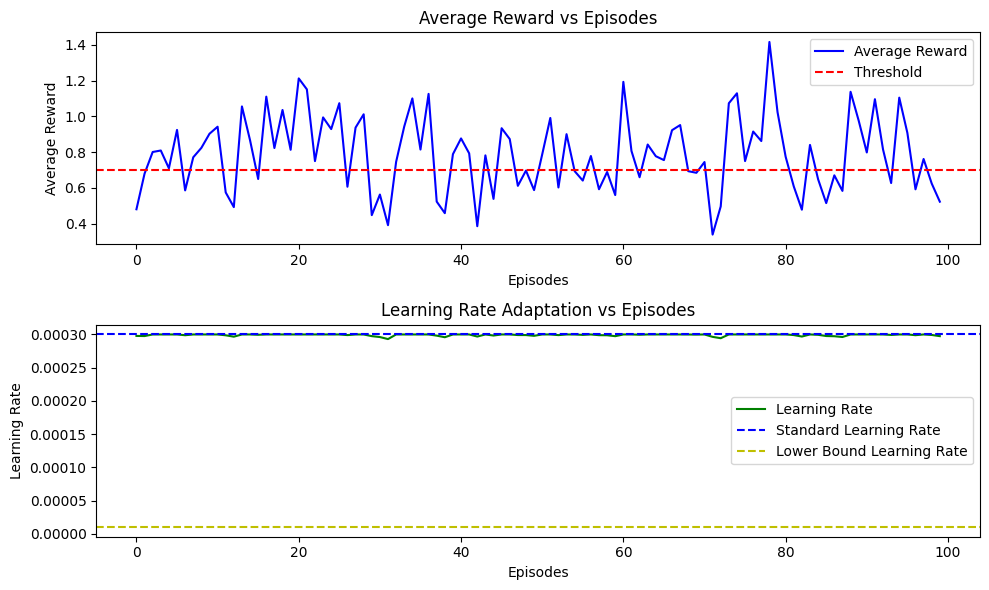

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
standard_lr = 0.0003  # Standard learning rate
lower_bound_lr = 0.00001  # Lower bound for learning rate
threshold = 0.7  # Threshold for reward to adjust learning rate
reward_variation = 0.2  # Simulate reward fluctuations
adjustment_factor = 0.00001  # How much the learning rate adjusts per reward drop below threshold

# Initialize variables
learning_rate = standard_lr
rewards = []
learning_rates = []

# Simulate rewards and learning rate adjustment over 100 episodes
for episode in range(100):
    # Simulate reward with some variation
    avg_reward = np.random.normal(0.8, reward_variation)
    rewards.append(avg_reward)
    
    # If average reward is below the threshold, adjust the learning rate
    if avg_reward < threshold:
        # Calculate the adjustment based on the difference between the threshold and the reward
        adjustment = (threshold - avg_reward) * adjustment_factor
        learning_rate -= adjustment  # Reduce learning rate gradually
        
        # Ensure the learning rate stays within bounds, but do not let it drop suddenly
        learning_rate = max(min(learning_rate, standard_lr), lower_bound_lr)
    else:
        # Reset learning rate to the standard value if above threshold
        learning_rate = standard_lr
    
    # Append the adjusted learning rate
    learning_rates.append(learning_rate)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot average rewards
plt.subplot(2, 1, 1)
plt.plot(rewards, label='Average Reward', color='b')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.legend()

# Plot learning rates
plt.subplot(2, 1, 2)
plt.plot(learning_rates, label='Learning Rate', color='g')
plt.axhline(y=standard_lr, color='b', linestyle='--', label='Standard Learning Rate')
plt.axhline(y=lower_bound_lr, color='y', linestyle='--', label='Lower Bound Learning Rate')
plt.xlabel('Episodes')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Adaptation vs Episodes')
plt.legend()

plt.tight_layout()
plt.show()


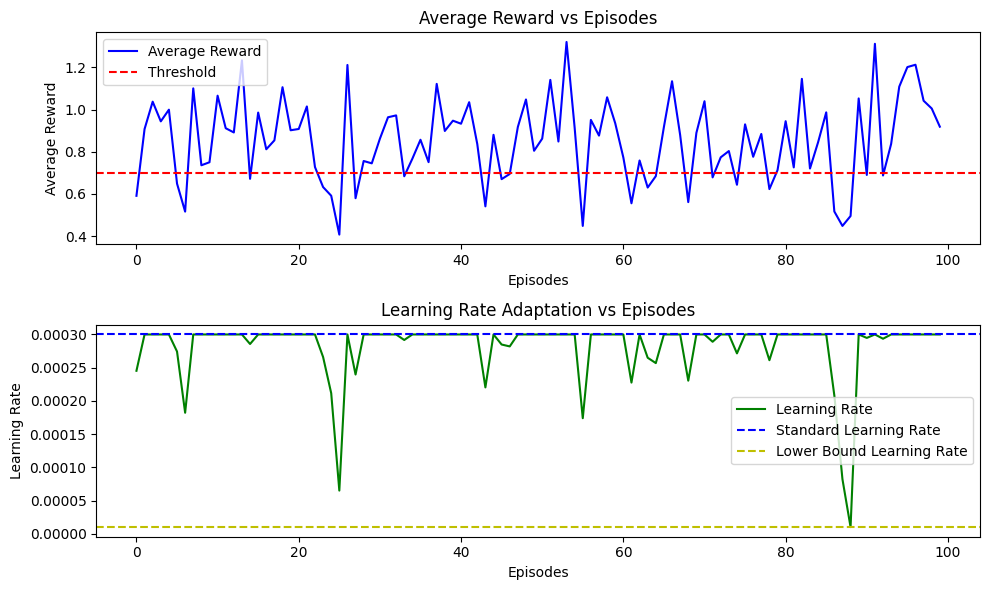

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
standard_lr = 0.0003  # Standard learning rate
lower_bound_lr = 0.00001  # Lower bound for learning rate
threshold = 0.7  # Threshold for reward to adjust learning rate
reward_variation = 0.2  # Simulate reward fluctuations
adjustment_factor = 0.00001  # Base adjustment factor for learning rate
temperature = 50  # Temperature control (set to 0 for no impact, higher values increase impact)

# Initialize variables
learning_rate = standard_lr
rewards = []
learning_rates = []

# Simulate rewards and learning rate adjustment over 100 episodes
for episode in range(100):
    # Simulate reward with some variation
    avg_reward = np.random.normal(0.8, reward_variation)
    rewards.append(avg_reward)
    
    # If average reward is below the threshold, adjust the learning rate
    if avg_reward < threshold:
        # Calculate the adjustment based on the difference between the threshold and the reward
        adjustment = (threshold - avg_reward) * adjustment_factor * temperature
        learning_rate -= adjustment  # Reduce learning rate gradually
        
        # Ensure the learning rate stays within bounds, but do not let it drop suddenly
        learning_rate = max(min(learning_rate, standard_lr), lower_bound_lr)
    else:
        # Reset learning rate to the standard value if above threshold
        learning_rate = standard_lr
    
    # Append the adjusted learning rate
    learning_rates.append(learning_rate)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot average rewards
plt.subplot(2, 1, 1)
plt.plot(rewards, label='Average Reward', color='b')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.legend()

# Plot learning rates
plt.subplot(2, 1, 2)
plt.plot(learning_rates, label='Learning Rate', color='g')
plt.axhline(y=standard_lr, color='b', linestyle='--', label='Standard Learning Rate')
plt.axhline(y=lower_bound_lr, color='y', linestyle='--', label='Lower Bound Learning Rate')
plt.xlabel('Episodes')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Adaptation vs Episodes')
plt.legend()

plt.tight_layout()
plt.show()
